In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import time
import numpy as np
import sys

In [2]:
import io, os, sys, types
from IPython import get_ipython
from nbformat import read
from IPython.core.interactiveshell import InteractiveShell
def find_notebook(fullname, path=None):
    """find a notebook, given its fully qualified name and an optional path
    
    This turns "foo.bar" into "foo/bar.ipynb"
    and tries turning "Foo_Bar" into "Foo Bar" if Foo_Bar
    does not exist.
    """
    name = fullname.rsplit('.', 1)[-1]
    if not path:
        path = ['']
    for d in path:
        nb_path = os.path.join(d, name + ".ipynb")
        if os.path.isfile(nb_path):
            return nb_path
        # let import Notebook_Name find "Notebook Name.ipynb"
        nb_path = nb_path.replace("_", " ")
        if os.path.isfile(nb_path):
            return nb_path
        
class NotebookLoader(object):
    """Module Loader for Jupyter Notebooks"""
    def __init__(self, path=None):
        self.shell = InteractiveShell.instance()
        self.path = path
    
    def load_module(self, fullname):
        """import a notebook as a module"""
        path = find_notebook(fullname, self.path)
        
        print ("importing Jupyter notebook from %s" % path)
                                       
        # load the notebook object
        with io.open(path, 'r', encoding='utf-8') as f:
            nb = read(f, 4)
        
        
        # create the module and add it to sys.modules
        # if name in sys.modules:
        #    return sys.modules[name]
        mod = types.ModuleType(fullname)
        mod.__file__ = path
        mod.__loader__ = self
        mod.__dict__['get_ipython'] = get_ipython
        sys.modules[fullname] = mod
        
        # extra work to ensure that magics that would affect the user_ns
        # actually affect the notebook module's ns
        save_user_ns = self.shell.user_ns
        self.shell.user_ns = mod.__dict__
        
        try:
          for cell in nb.cells:
            if cell.cell_type == 'code':
                # transform the input to executable Python
                code = self.shell.input_transformer_manager.transform_cell(cell.source)
                # run the code in themodule
                exec(code, mod.__dict__)
        finally:
            self.shell.user_ns = save_user_ns
        return mod
class NotebookFinder(object):
    """Module finder that locates Jupyter Notebooks"""
    def __init__(self):
        self.loaders = {}
    
    def find_module(self, fullname, path=None):
        nb_path = find_notebook(fullname, path)
        if not nb_path:
            return
        
        key = path
        if path:
            # lists aren't hashable
            key = os.path.sep.join(path)
        
        if key not in self.loaders:
            self.loaders[key] = NotebookLoader(path)
        return self.loaders[key]

sys.meta_path.append(NotebookFinder())

importing Jupyter notebook from dl_pytorch_1.ipynb
tensor([[-1.2083, -0.0653],
        [-2.1506, -0.1450],
        [-0.7857,  0.6424],
        [ 0.3908,  0.0107],
        [-0.4416, -1.4537],
        [-0.4268, -0.5660],
        [ 1.2746,  0.3294],
        [ 0.0026, -0.5007],
        [-1.1575, -0.1355],
        [ 1.1208,  0.2721]]) tensor([1.9879, 0.3833, 0.4359, 4.9640, 8.2561, 5.2624, 5.6195, 5.9279, 2.3417,
        5.5088])
epoch 1, loss 0.040582
epoch 2, loss 0.000152
epoch 3, loss 0.000047
[2, -3.4] 
 tensor([[ 1.9995],
        [-3.3988]], requires_grad=True)
4.2 
 tensor([4.1997], requires_grad=True)
LinearNet(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)
Parameter containing:
tensor([[ 0.1615, -0.1427]], requires_grad=True)
Parameter containing:
tensor([0.3477], requires_grad=True)
SGD (
Parameter Group 0
    dampening: 0
    lr: 0.03
    momentum: 0
    nesterov: False
    weight_decay: 0
)
epoch 1, loss: 0.000379 ;
epoch 2, loss: 0.000154 ;
epoch 3, loss: 0.000

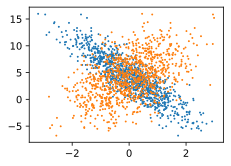

In [3]:
import dl_pytorch_1 as dl1

In [4]:
mnist_train = torchvision.datasets.FashionMNIST(root='/Users/bob/docs/dataset',train=True,download=False,transform=transforms.ToTensor())

In [5]:
mnist_test = torchvision.datasets.FashionMNIST(root='/Users/bob/docs/dataset/',train=False,download=False,transform=transforms.ToTensor())

In [6]:
print(type(mnist_train))

<class 'torchvision.datasets.mnist.FashionMNIST'>


In [7]:
print(type(mnist_test))

<class 'torchvision.datasets.mnist.FashionMNIST'>


In [8]:
len(mnist_test)

10000

In [9]:
def get_fashion_mnist_labels(labels):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

    return [text_labels[int(i)] for i in labels]

In [10]:
def show_fashion_mnist(images, labels):
    dl1.use_svg_display()
    # 这里的_表示我们忽略（不使用）的变量
    _, figs = plt.subplots(1, len(images), figsize=(12, 12))
    for f, img, lbl in zip(figs, images, labels):
        f.imshow(img.view((28, 28)).numpy())
        f.set_title(lbl)
        f.axes.get_xaxis().set_visible(False)
        f.axes.get_yaxis().set_visible(False)
    plt.show()

显示数据集前十张图片以及对应的类别

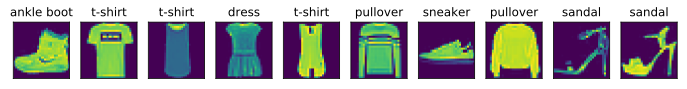

In [11]:
X, y = [], []
for i in range(10):
    X.append(mnist_train[i][0])
    y.append(mnist_train[i][1])
show_fashion_mnist(X, get_fashion_mnist_labels(y))

In [12]:
def load_data_from_fmnist():
    batch_size = 256
    if sys.platform.startswith('win'):
        num_workers = 0
    else:
        num_workers = 4
    train_it = torch.utils.data.DataLoader(mnist_train,batch_size=batch_size,shuffle=True,num_workers=num_workers)
    test_it = torch.utils.data.DataLoader(mnist_test,batch_size=batch_size,shuffle=False,num_workers=num_workers)
    return train_it,test_it

In [13]:
start = time.time()

In [14]:
train_iter, test_iter = load_data_from_fmnist()
for a,b in train_iter:
    continue

print('%.2f sec' % (time.time() - start))

1.80 sec


In [15]:
num_inputs = 28*28
num_outputs = 10

**这里设定初始模型参数**

In [16]:
# 正态分布
# W的维度应该为像素数目（特征数目）* 类别数目（labels）= [num_inputs,num_outputs] 
W = torch.tensor(np.random.normal(0,0.01,(num_inputs,num_outputs)),dtype=torch.float)
#b 的维度就是labels数目
b=torch.zeros(num_outputs,dtype=torch.float)

#对于每个输入张量，有labels_pred = x*W+b

In [17]:
W.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)

In [18]:
def softmax(X):
    X_exp = X.exp()#element-wise exponential
    partition = X_exp.sum(dim=1,keepdim=True)
    return X_exp/partition

In [19]:
X = torch.rand(2,5)

In [20]:
X_prob=softmax(X)

In [21]:
print(X_prob,X_prob.sum(dim=1))

tensor([[0.2737, 0.2530, 0.1202, 0.1428, 0.2102],
        [0.1509, 0.2155, 0.1908, 0.2833, 0.1595]]) tensor([1.0000, 1.0000])


In [22]:
def net(X):
    return softmax(torch.mm(X.view((-1,num_inputs)),W)+b)#批量处理，broadcast

In [23]:
def cross_entropy(y_hat,y):
    return - torch.log(y_hat.gather(1,y.view(-1,1)))

In [24]:
def accuracy(y_hat,y):#验证准确率
    return (y_hat.argmax(dim=1) == y).float().mean.item()

In [25]:
def evaluate_accuracy(data_iter,net):
    acc_sum, n = 0.0,0
    for X,y in data_iter:
        #统计每一个Batch里的准确率
        acc_sum+=(net(X).argmax(dim=1) == y).float().sum().item()
        n+=y.shape[0]
    return acc_sum/n

In [26]:
evaluate_accuracy(test_iter,net)

0.0546

In [27]:
epochs , lr = 5, 0.1 #迭代周期数 学习率

def train_ch3(net,train_iter,test_iter,loss,epochs,batch_size,params=None,lr=None,optimizer=None):
    #训练
    for epoch in range(epochs):
        train_l_sum , train_acc_sum,n= 0.0,0.0,0
        for X,y in train_iter:#X为图像
            y_hat=net(X)#对该次输入的预测值
            l = loss(y_hat,y).sum()
            
            #梯度清零
            if optimizer is not None:
                optimizer.zero_grad()
            elif params is not None and params[0].grad is not None:
                for param in params:
                    param.grad.data.zero_()
            
            l.backward()
            
            if optimizer is None:
                dl1.sgd(params,lr,batch_size)
            else:
                optimizer.step()
                
            
            train_l_sum += l.item()#统计总的损失
            train_acc_sum+=(y_hat.argmax(dim=1) == y).sum().item()#统计准确率
            #y.shape[0]为batch_size个label
            n+=y.shape[0]
        #一个epoch走完
        test_acc = evaluate_accuracy(test_iter,net)
        print("Epoch %d, loss %.4f, train accuracy %.3f, test accuracy %.3f" %(epoch+1,train_l_sum/n,train_acc_sum/n,test_acc))
            

In [28]:
batch_size = 256
train_ch3(net,train_iter,test_iter,cross_entropy,epochs,batch_size,[W,b],lr)

Epoch 1, loss 0.7878, train accuracy 0.747, test accuracy 0.783
Epoch 2, loss 0.5713, train accuracy 0.813, test accuracy 0.809
Epoch 3, loss 0.5247, train accuracy 0.827, test accuracy 0.820
Epoch 4, loss 0.5014, train accuracy 0.831, test accuracy 0.817
Epoch 5, loss 0.4852, train accuracy 0.837, test accuracy 0.828


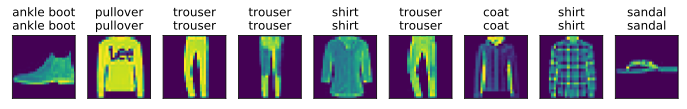

In [29]:
X,y = iter(test_iter).next()

#验证一下，取一个批次的前十张
true_labels = get_fashion_mnist_labels(y.numpy())
pred_labels = get_fashion_mnist_labels(net(X).argmax(dim=1).numpy())

titles = [true + '\n' + pre for true ,pre in zip(true_labels,pred_labels)]

show_fashion_mnist(X[0:9],titles[0:9])